## Example: Build a Product Development Score Regression Model
NewCo Inc. is in the process of developing a new food product formulation. The quality of the product is evaluated based on 7200 features such as taste, mouthfeel, storage life, acidity, etc. The company has conducted tests on 100 different product formulations and has manually assessed the overall quality of these formulations.
* NewCo Inc. aims to replace the expensive manual testing with an automated system that can predict a product quality score using a combination of the 7200 feature scores, which is inexpensive relative to manual testing.
* The company is seeking the development of a linear regression model that can estimate the overall product score based on the feature scores.

## Setup
This example requires several external libraries and a function to compute the outer product. Let's download and install these packages and call our `Include.jl` file.

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-10/L10a`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-10/L10a/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-10/L10a/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-10/L10a/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-10/L10a/Manifest.toml`


## Prerequisites 
Let's load the `data matrix` $\mathbf{X}$ (which holds the measurements) and the output vector $\mathbf{Y}$ (which holds the product scores) using the `load datafiles (...)` function.
* The `data matrix` $\mathbf{X}$ is a `100` $\times$ `7200` array, where the rows hold a product formulation, and the columns hold the feature scores.
* The `output vector` $\mathbf{Y}$ is a `100`$\times$ `1` column vector which holds the overall score for formulation $i$.

In [2]:
y = loaddatafiles(joinpath(_PATH_TO_DATA, "score.csv"));
X = loaddatafiles(joinpath(_PATH_TO_DATA, "sample.csv"));

Finally, let's partition the data into a `training` and `testing` set so that we can determine how well the model can predict unseen data, i.e., how well the model `generalizes`.

In [3]:
fraction = 0.90
(X_train, X_test) = partition(X; trainfraction = fraction);
(y_train, y_test) = partition(y; trainfraction = fraction);

## Expected value of the parameters $\beta$ without regularization
We know that the `data matrix` $\mathbf{X}$ is `underdetermined`, i.e., $m<n$ (more unknowns than equations). However, let's treat this as if it was `overdetermined`, i.e., we are solving the minimization problem for an unknown parameter estimates $\hat{\beta}$:
$$
\begin{equation*}
\hat{\mathbf{\beta}} = \arg\min_{\mathbf{\beta}} ||~\mathbf{y} - \mathbf{X}\cdot\mathbf{\beta}~||^{2}_{2}
\end{equation*}
$$
where $||\star||^{2}_{2}$ is the square of the p = 2 vector norm. Then, the value of the unknown parameter vector $\mathbf{\beta}$ that minimizes the sum of the squares loss function for an overdetermined system is given by:
\begin{equation*}
\hat{\mathbf{\beta}} = \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\mathbf{y} - \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\mathbf{\epsilon}
\end{equation*}
The matrix $\mathbf{X}^{T}\mathbf{X}$ is called the normal matrix, while $\mathbf{X}^{T}\mathbf{y}$ is called the moment matrix. The __expectation__ removes the error term.

In [4]:
β̂ = inv(transpose(X_train)*X_train)*transpose(X_train)*y_train
ŷ_train = X_train*β̂;

#### Check: What is the `distance` between the trained and estimated score array

In [24]:
δ = norm(ŷ_train - X_train*β̂)

6460.210574757302

#### Check: How do we predict the `test` data?

In [17]:
ŷ_test = X_test*β̂
xy_line = -100:0.01:100 |> collect;

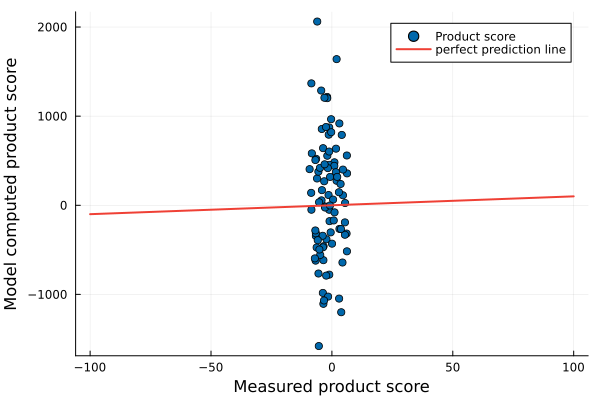

In [18]:
scatter(y_train,ŷ_train,label="Product score",c=colorant"#0068AC")
#scatter(y_test,ŷ_test, xlim=[-10.0,10.0],ylim=[-10,10],label="Product score",c=colorant"#0068AC")
plot!(xy_line,xy_line,lw=2, label="perfect prediction line", c=colorant"#EF4035");
xlabel!("Measured product score", fontsize=18)
ylabel!("Model computed product score", fontsize=18)

## Expected value of the parameters $\beta$ with regularization
We can treat the `underdetermined` case as a regularization problem. If we use `lasso` regularization, i.e., we add a $||\,\beta\,||_{2}^{2}$ term to the objective function:
$$
\begin{equation*}
\hat{\mathbf{\beta}} = \arg\min_{\mathbf{\beta}} ||~\mathbf{y} - \mathbf{X}\cdot\mathbf{\beta}~||^{2}_{2} + \lambda\cdot{||\,\beta\,||_{2}^{2}}
\end{equation*}
$$

where $\lambda\leq{0}$ is called a `regularization` parameter. This problem has an analytical soluton of the form:
\begin{equation*}
\hat{\mathbf{\beta}} = \left(\mathbf{X}^{T}\mathbf{X}+\lambda\cdot\mathbf{I}\right)^{-1}\mathbf{X}^{T}\mathbf{y} - \left(\mathbf{X}^{T}\mathbf{X}+\lambda\cdot\mathbf{I}\right)^{-1}\mathbf{X}^{T}\mathbf{\epsilon}
\end{equation*}
The __expectation__ removes the error term.

In [7]:
λ = 10.0;
IM = diagm(ones(7200));

In [8]:
β̂ = inv(transpose(X_train)*X_train + λ*IM)*transpose(X_train)*y_train;
ŷ_train_reg = X_train*β̂;

### Check: What is the `distance` between the trained and estimated score array for the regularized case?

In [25]:
δ_reg = norm(ŷ_train_reg - X_train*β̂)

0.0

In [21]:
# compute Yhat  -
ŷ_test_reg = X_test*β̂
xy_line = -10:0.01:10 |> collect;

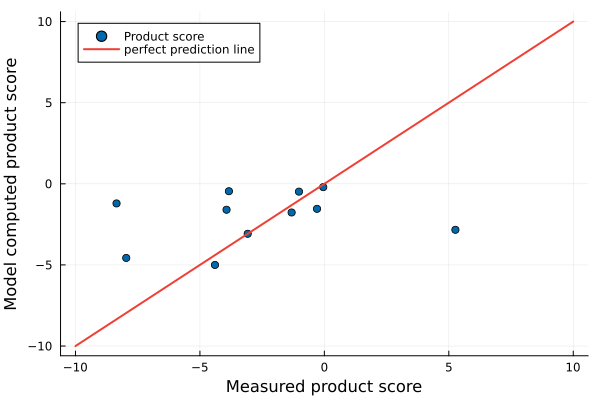

In [22]:
#scatter(y_train,ŷ_train_reg, xlim=[-10.0,10.0],ylim=[-10,10],label="Product score",c=colorant"#0068AC")
scatter(y_test,ŷ_test_reg,label="Product score",c=colorant"#0068AC")
plot!(xy_line,xy_line,lw=2, label="perfect prediction line", c=colorant"#EF4035");
xlabel!("Measured product score", fontsize=18)
ylabel!("Model computed product score", fontsize=18)